### step-1: Import Required libraries 

In [18]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

### step-2: Load the dataset 

In [19]:
df=pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


### step-3: Data Preprocessing

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [21]:
# check missing values
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [22]:
# droping the column which is not required for analysis
df.drop(columns=['CustomerID', 'Gender'], inplace=True)


### step-4: EDA

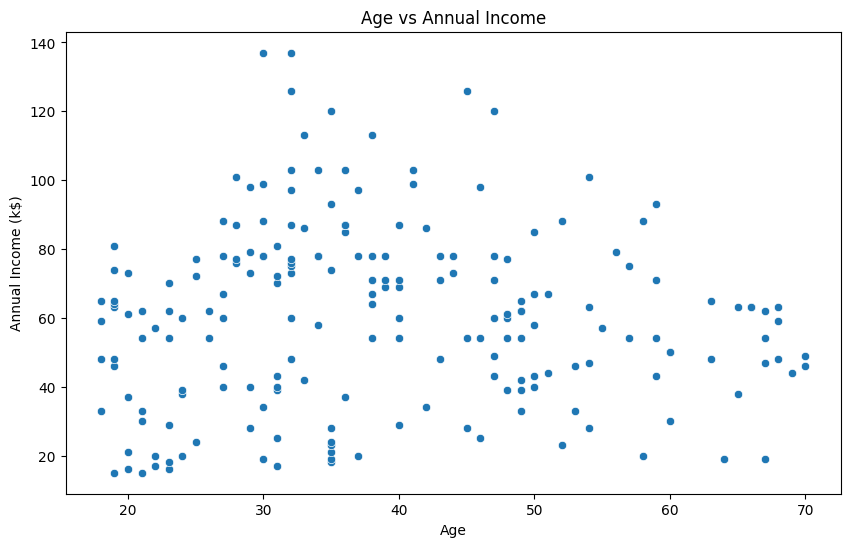

In [23]:
# display age and annual income scatter plot
plt.figure(figsize=(10,6))
sns.scatterplot(x='Age', y='Annual Income (k$)', data=df)
plt.title('Age vs Annual Income')   
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')
plt.show()

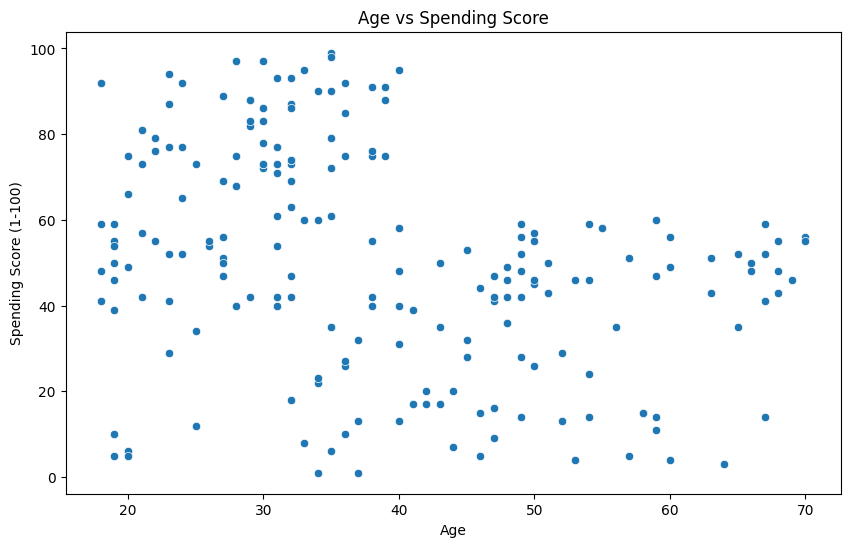

In [24]:
# display age and spending score scatter plot
plt.figure(figsize=(10,6))
sns.scatterplot(x='Age', y='Spending Score (1-100)', data=df)
plt.title('Age vs Spending Score')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.show()

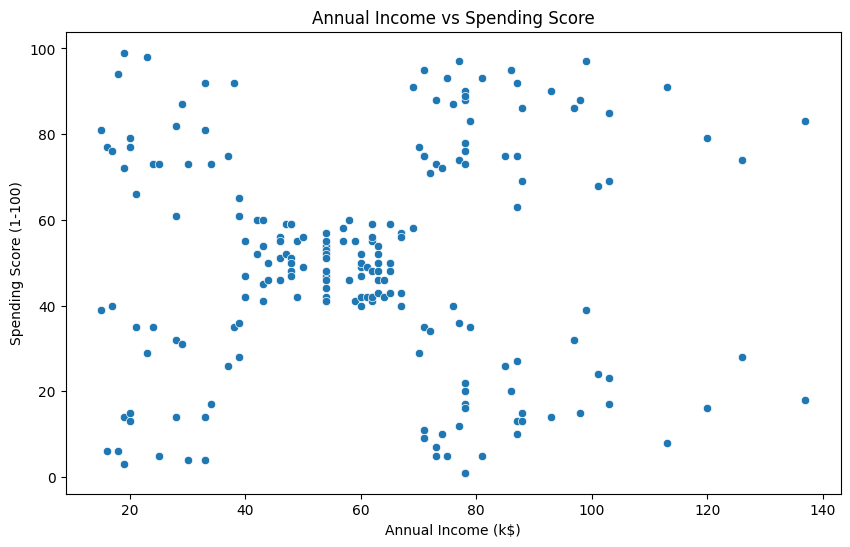

In [25]:
# display annual income and spending score scatter plot
plt.figure(figsize=(10,6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=df)
plt.title('Annual Income vs Spending Score')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

### step-5: Feature Engineering 

In [28]:
# display skewness name normal, right skewed, left skewed
def skewness_name(skewness):
    if skewness > 0:
        return 'Right Skewed'
    elif skewness < 0:
        return 'Left Skewed'
    else:
        return 'Normal'
print('Skewness of Age:', skewness_name(df['Age'].skew()))
print('Skewness of Annual Income:', skewness_name(df['Annual Income (k$)'].skew()))
print('Skewness of Spending Score:', skewness_name(df['Spending Score (1-100)'].skew()))

    

Skewness of Age: Right Skewed
Skewness of Annual Income: Right Skewed
Skewness of Spending Score: Left Skewed


In [29]:
# scalling the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data=scaler.fit_transform(df)
df=pd.DataFrame(scaled_data, columns=df.columns)
df.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,-1.424569,-1.738999,-0.434801
1,-1.281035,-1.738999,1.195704
2,-1.352802,-1.700830,-1.715913
3,-1.137502,-1.700830,1.040418
4,-0.563369,-1.662660,-0.395980


### step-6: Train K-Mean model

In [30]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(df)
df['Cluster'] = kmeans.labels_
df.head()

,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,-1.424569,-1.738999,-0.434801,2
1,-1.281035,-1.738999,1.195704,2
2,-1.352802,-1.700830,-1.715913,3
3,-1.137502,-1.700830,1.040418,2
4,-0.563369,-1.662660,-0.395980,2


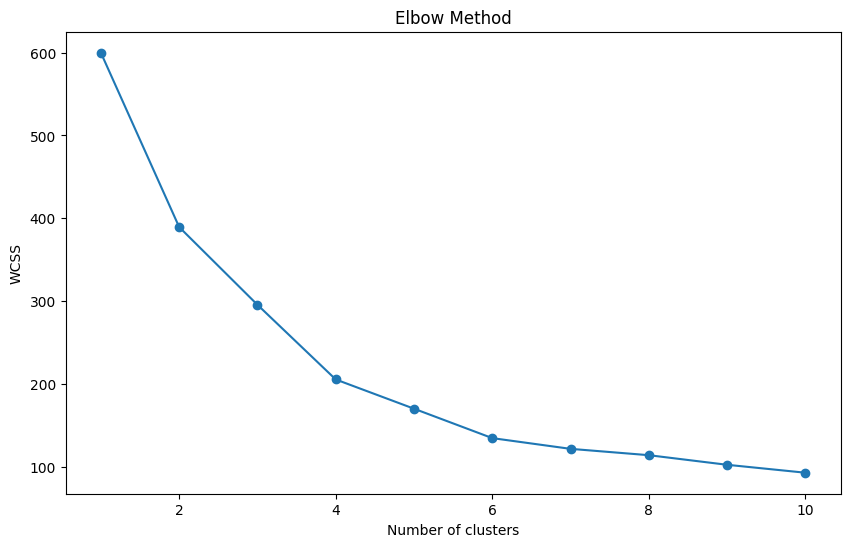

In [31]:
# check with Elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(df.drop(columns='Cluster',axis=1))
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(10,6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


Text(0, 0.5, 'Annual Income (k$)')

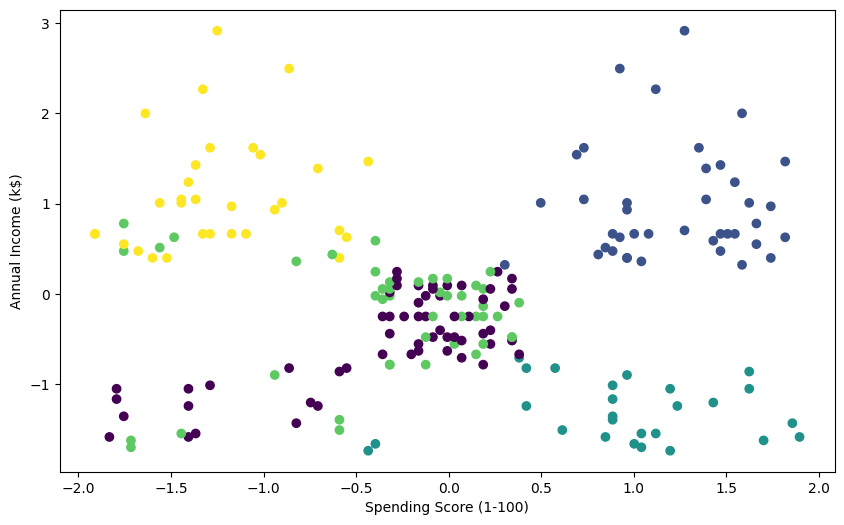

In [38]:
# display the clusters 
plt.figure(figsize=(10,6))
plt.scatter(df["Spending Score (1-100)"], df["Annual Income (k$)"], c=df['Cluster'])
plt.xlabel('Spending Score (1-100)')
plt.ylabel('Annual Income (k$)')


In [39]:
# save the file
df.to_csv('clustered_mall_customers.csv', index=False)

In [50]:
# checking unique values in cluster column 
df['Cluster'].unique()

array([2, 3, 0, 1, 4])

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

In [42]:
# Load dataset
df = pd.read_csv("clustered_mall_customers.csv")

In [51]:
# Features and target
X = df.drop(columns='Cluster', axis=0)
y = df['Cluster']

In [52]:
# Split data into train and test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [53]:
# train the mmodel DT
from sklearn.tree import DecisionTreeClassifier

# load the model
model = DecisionTreeClassifier(random_state=42)

# Train model
model.fit(X_train, y_train)

# predict the model
y_pred = model.predict(X_test)

#check the accuracy of the model
from sklearn.metrics import accuracy_score
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.95


In [54]:
# saves the model
import joblib
joblib.dump(model, 'kmeans_model.pkl')

['kmeans_model.pkl']